# IDR Download & Timeshift

In [7]:
import os
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt
import cx_Oracle
from subprocess import Popen, PIPE

os.getcwd()
base = 'C:\\Users\\wb5888\Documents\\Raw IDR Data\\NEPOOL\\NRI'
os.chdir(base)
print('working in {}.'.format(base))

working in C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\NRI.


## Meters to download

In [15]:
meters = ['NEPOOL_NRI_2529175006', 'NEPOOL_NRI_4703951002', 'NEPOOL_NRI_6507868006', 'NEPOOL_NRI_9111788007']
meters

['NEPOOL_NRI_2529175006',
 'NEPOOL_NRI_4703951002',
 'NEPOOL_NRI_6507868006',
 'NEPOOL_NRI_9111788007']

## Command line import

In [12]:
def pipe_import(meter, path):

    ch = '1'
    final = ",".join([meter, ch])
    filename = ".".join([meter, 'csv'])
    write_path = os.path.join(path,filename)

    cmd_prmpt = ["C:\LODESTAR\Bin\intdexp", "-c", "Data Source=TPPE;User ID=tesi_interface;Password=peint88;LSProvider=ODP;",\
                 "-q", "pwrline", "-f", "C:\LODESTAR\cfg\examples\Cfg\lodestar.cfg", "-s", "05/01/2015", "-t", "05/31/2016",\
                 "-dtuse", "PARTIAL", "-d", "hi", final, "-o", write_path]

    x = Popen(cmd_prmpt, stdout = PIPE, stderr = PIPE)
    output, errors = x.communicate()

### Download meter data

In [7]:
for meter in meters:
    pipe_import(meter, base)

## Import and merge data

In [10]:
def data_import(file, path):
    
    os.chdir(path)
    data = pd.read_csv(file, header = None, index_col = 0)

    data.reset_index(drop = True, inplace = True)
    data.drop(data.columns[[1, 3]], axis = 1, inplace = True)
    data.columns = ['ch1', 'time']
    data.time = pd.to_datetime(data.time)
    data.index = data.time
    data.drop(data.columns[1], axis = 1, inplace = True)
    
    return(data)

In [5]:
def merge_idr(meters, idr_dir):

    print("importing and merging .csv's...")
    master_idr = pd.DataFrame()

    for accts in meters:
    
        try:
            idr_file = ''.join([accts, '.csv'])
    
            acct_idr = data_import(idr_file, idr_dir)
            acct_idr.columns = [accts]
    
            master_idr = pd.concat([master_idr, acct_idr], axis = 1)
            master_idr.fillna(0, axis = 1)
    
        except:
            print('import error, acct {}.'.format(accts))

        
    print('read in and merged ch 1.')
    master_idr.head()
    master_idr.fillna(0, axis = 1)
    
    return(master_idr)

### Run import

In [11]:
data = merge_idr(meters, base)

importing and merging .csv's...
import error, acct NEPOOL_NRI_2529175006.
import error, acct NEPOOL_NRI_4703951002.
import error, acct NEPOOL_NRI_6507868006.
import error, acct NEPOOL_NRI_9111788007.
read in and merged ch 1.


In [8]:
main = data
main.head()

""


### Clean data & export

In [61]:
name = ".".join([meters[3], 'csv'])
#d = pd.DataFrame(data_import(name, base))
a = pd.DataFrame(main[meters[0]])
b = pd.DataFrame(main[meters[1]])
c = pd.DataFrame(main[meters[2]])

a.columns = ['v']
b.columns = ['v']
c.columns = ['v']
d.columns = ['v']

In [16]:
filenames = [".".join([x, 'csv']) for x in meters]
filenames

['NEPOOL_NRI_2529175006.csv',
 'NEPOOL_NRI_4703951002.csv',
 'NEPOOL_NRI_6507868006.csv',
 'NEPOOL_NRI_9111788007.csv']

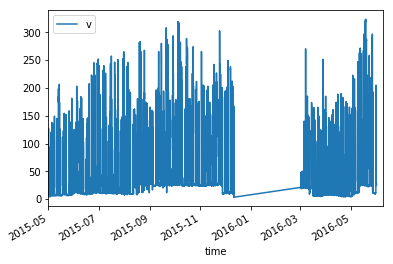

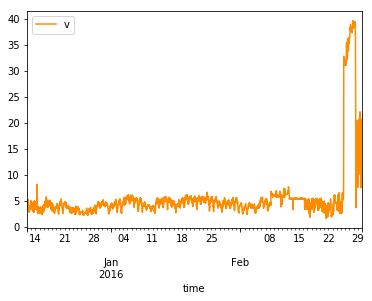

In [105]:
less = [(this.year >= 2015) and (this.month > 11) and (this.day > 11) for this in a.index]
more = [(this.month < 3) for this in a.index]

both = [x or y for x, y in zip(less, more)]

good = [not b for b in both]

a[good].plot(y = 'v')
a[both].plot(y = 'v', color = 'darkorange')

In [119]:
sum_daily = sum(a.v[both])
sum_daily

11057.920000000002

In [112]:
first, last = (min(a.index[both]), max(a.index[both]))
last - first

Timedelta('79 days 23:00:00')

## Data Import

In [39]:
direct = list(os.listdir(base))

for i, f in enumerate(direct):
    print((i, f))

(0, '0091864050_NRI_IDR_RAW.csv')
(1, '1298709039_NRI_IDR_RAW.csv')
(2, '1452828000_NRI_IDR_RAW.csv')
(3, '2603004004_NRI_IDR_RAW(2).csv')
(4, '2603004004_NRI_IDR_RAW.csv')
(5, '3850498013 SYNAGRO KWH DEL_NRI_IDR_RAW.csv')
(6, '3850498013 SYNAGRO KWH REC_NRI_IDR_RAW.csv')
(7, '5334624006_NRI_IDR_RAW.csv')
(8, '5994331006_NRI_IDR_RAW.csv')
(9, '6399411008_NRI_IDR_RAW.csv')
(10, '6461481038_NRI_IDR_RAW.csv')
(11, '7570369039_NRI_IDR_RAW.csv')
(12, '7701898005_NRI_IDR_RAW.csv')
(13, '8766792007_NRI_IDR_RAW.csv')
(14, '8981705004_NRI_IDR_RAW.csv')
(15, 'NEPOOL_NRI_2529175006.csv')
(16, 'NEPOOL_NRI_2529175006_timeshift.csv')
(17, 'NEPOOL_NRI_2529175006_val.csv')
(18, 'NEPOOL_NRI_4106199002_ch3_extend.csv')
(19, 'NEPOOL_NRI_4703951002.csv')
(20, 'NEPOOL_NRI_4703951002_timeshift.csv')
(21, 'NEPOOL_NRI_4703951002_val.csv')
(22, 'NEPOOL_NRI_5373369008.csv')
(23, 'NEPOOL_NRI_5373369008_288_to_3.lse')
(24, 'NEPOOL_NRI_6507868006.csv')
(25, 'NEPOOL_NRI_6507868006_timeshift.csv')
(26, 'NEPOOL_NRI_6

In [25]:
meters

['NEPOOL_NRI_2529175006',
 'NEPOOL_NRI_4703951002',
 'NEPOOL_NRI_6507868006',
 'NEPOOL_NRI_9111788007']

In [17]:
filenames

['NEPOOL_NRI_2529175006.csv',
 'NEPOOL_NRI_4703951002.csv',
 'NEPOOL_NRI_6507868006.csv',
 'NEPOOL_NRI_9111788007.csv']

In [47]:
pull = [16, 20, 25, 28]
filenames = []

for p in pull:
    filenames.append(direct[p])
    
filenames

['NEPOOL_NRI_2529175006_timeshift.csv',
 'NEPOOL_NRI_4703951002_timeshift.csv',
 'NEPOOL_NRI_6507868006_timeshift.csv',
 'NEPOOL_NRI_9111788007_timeshift.csv']

In [46]:
direct[18, 3]

TypeError: list indices must be integers or slices, not tuple

In [53]:
main = pd.DataFrame()

for f in filenames:
    tmp = pd.read_csv(f, header = None)
    tmp.columns = ['t', 'v']
    meter = f.split('.')[0]
    
    tmp.t = pd.to_datetime(tmp.t)
    tmp.t = pd.DatetimeIndex(tmp.t)
    tmp.set_index('t', inplace = True, drop = True)
    tmp.v = [float(val) for val in tmp.v]
    tmp.columns = [meter]
    
    print(tmp.head())
    main = pd.concat([main, tmp], axis = 1)
    
main.head()

                     NEPOOL_NRI_2529175006_timeshift
t                                                   
2015-06-10 00:00:00                            11.60
2015-06-10 01:00:00                            11.52
2015-06-10 02:00:00                            11.60
2015-06-10 03:00:00                            11.68
2015-06-10 04:00:00                            11.76
                     NEPOOL_NRI_4703951002_timeshift
t                                                   
2015-06-10 00:00:00                             5.49
2015-06-10 01:00:00                             3.90
2015-06-10 02:00:00                             4.05
2015-06-10 03:00:00                             5.22
2015-06-10 04:00:00                             5.13
                     NEPOOL_NRI_6507868006_timeshift
t                                                   
2015-06-10 00:00:00                            33.78
2015-06-10 01:00:00                            45.42
2015-06-10 02:00:00                           

,NEPOOL_NRI_2529175006_timeshift,NEPOOL_NRI_4703951002_timeshift,NEPOOL_NRI_6507868006_timeshift,NEPOOL_NRI_9111788007_timeshift
t,,,,
2015-06-10 00:00:00,11.60,5.49,33.78,31.248
2015-06-10 01:00:00,11.52,3.90,45.42,31.104
2015-06-10 02:00:00,11.60,4.05,29.10,81.024
2015-06-10 03:00:00,11.68,5.22,29.04,78.336
2015-06-10 04:00:00,11.76,5.13,35.10,31.056


## Timeshift

In [64]:
ewx_dir = 'C:\\Users\\wb5888\\LA-tools\\EWX_Forecast'
os.chdir(ewx_dir)
import EWX_forecast as ewx
print('changed to {}.'.format(ewx_dir))

changed to C:\Users\wb5888\LA-tools\EWX_Forecast.


In [67]:
files = ewx.sortdir(base, 5)

files found in dir:  C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\NRI
                        files                time
0   NEPOOL_NRI_9111788007.csv 2019-06-26 15:02:31
1   NEPOOL_NRI_6507868006.csv 2019-06-26 15:02:31
2   NEPOOL_NRI_4703951002.csv 2019-06-26 15:02:31
3   NEPOOL_NRI_2529175006.csv 2019-06-26 15:02:31
4  6399411008_NRI_IDR_RAW.csv 2019-06-14 11:32:42


In [71]:
for files in filenames:
    ch1 = ewx.forecast_main(files, 4, base, base)

parsing data files...
using filename NEPOOL_NRI_2529175006.csv.
                  time     v
0  2015-05-01 00:00:00  7.84
1  2015-05-01 01:00:00  7.92
2  2015-05-01 02:00:00  7.36
3  2015-05-01 03:00:00  7.84
4  2015-05-01 04:00:00  7.84
read NEPOOL_NRI_2529175006.csv from C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\NRI.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  tmp2.lin[tmp2.lin.isnull()] = tmp2.v[tmp2.lin.isnull()]


wrote NEPOOL_NRI_2529175006.csv to C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\NRI.
forecasting...


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:303: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([year_data, future], axis = 0)


forecasted year 0 of 5 with 8736 reads.


C:\Users\wb5888\LA-tools\EWX_Forecast\EWX_forecast.py:315: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  master = pd.concat([master, forecast], axis = 0)


forecasted year 1 of 5 with 8736 reads.
forecasted year 2 of 5 with 8736 reads.
forecasted year 3 of 5 with 8736 reads.
forecasted year 4 of 5 with 8736 reads.
writing forecasts to .csv...
wrote NEPOOL_NRI_2529175006_timeshift.csv to C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\NRI.
parsing data files...
using filename NEPOOL_NRI_4703951002.csv.
                  time     v
0  2015-05-01 00:00:00  2.82
1  2015-05-01 01:00:00  2.97
2  2015-05-01 02:00:00  1.71
3  2015-05-01 03:00:00  2.85
4  2015-05-01 04:00:00  2.79
read NEPOOL_NRI_4703951002.csv from C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\NRI.
running data validations...
...
...
...
...
...
usage validated.
running usage estimation flags...
writing validated usage file to .csv...
wrote NEPOOL_NRI_4703951002.csv to C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\NRI.
forecasting...
forecasted year 0 of 5 with 8736 reads.
forecasted year 1 of 5 with 8736 reads.
forecasted year 2 of 5 with 8736 reads.
forecasted year 3 of 5 with 87

In [59]:
main.columns

Index(['NEPOOL_NRI_2529175006_timeshift', 'NEPOOL_NRI_4703951002_timeshift',
       'NEPOOL_NRI_6507868006_timeshift', 'NEPOOL_NRI_9111788007_timeshift'],
      dtype='object')

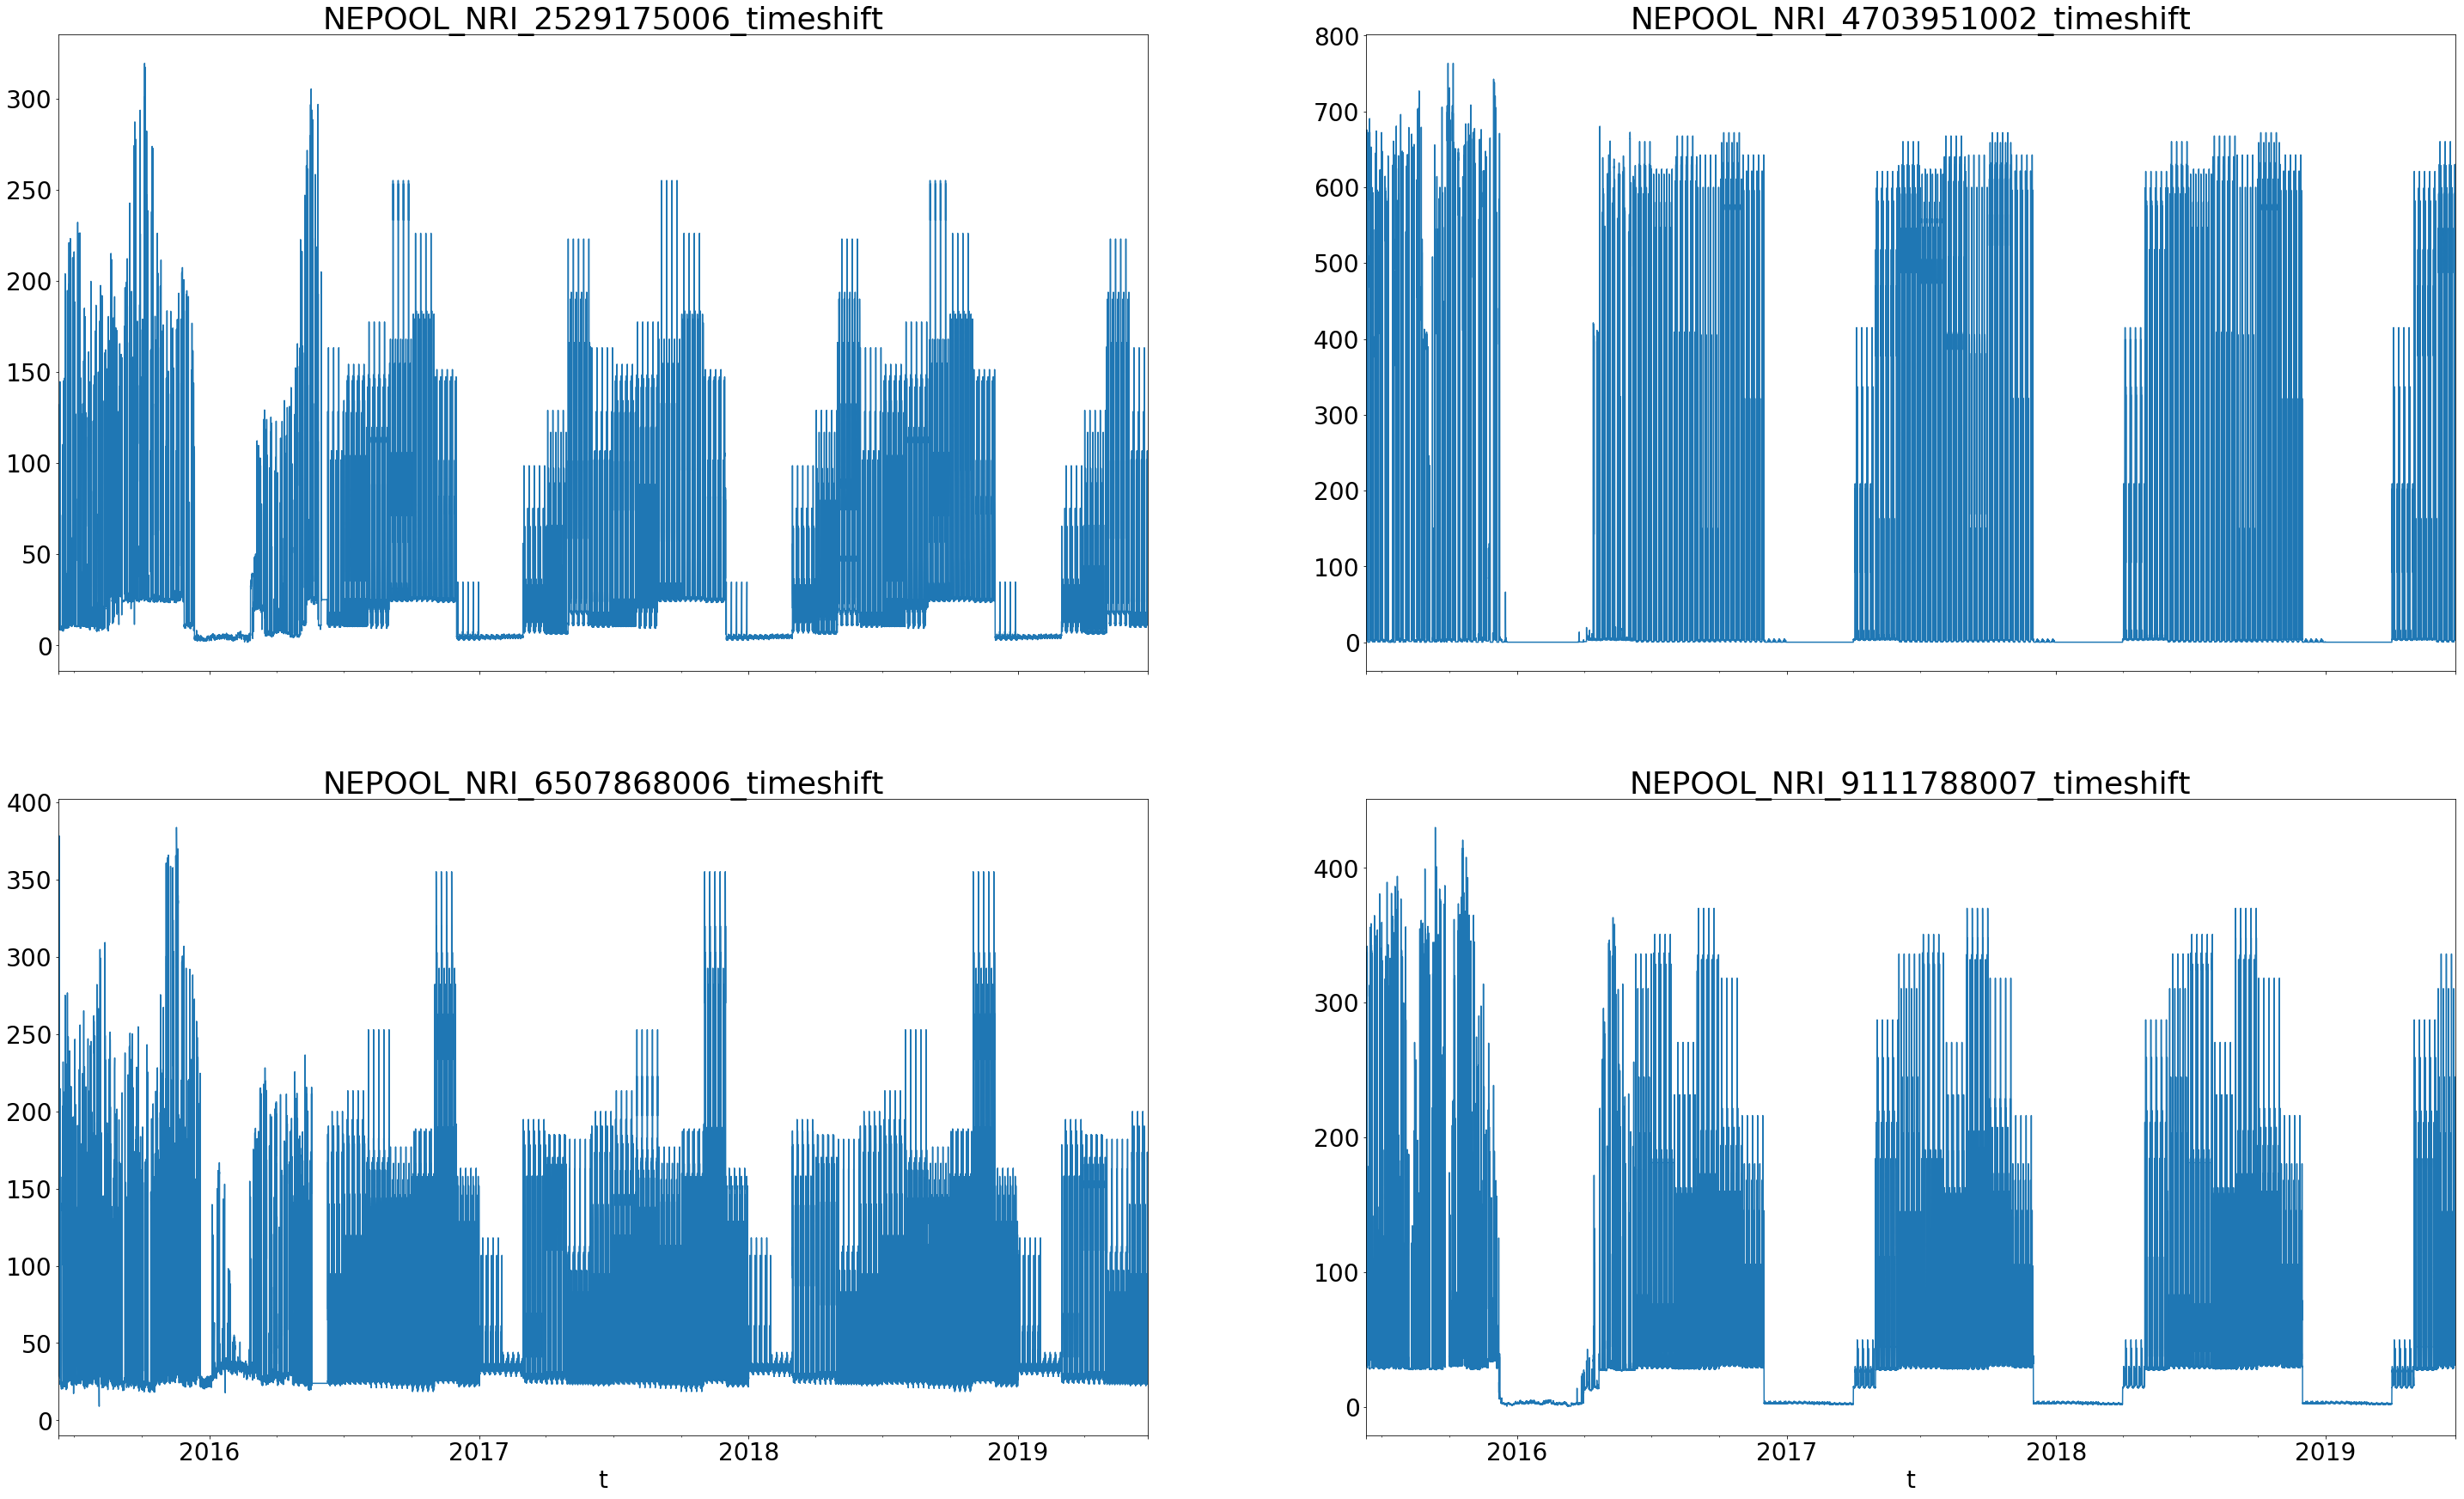

In [72]:
from collections import deque
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=False, figsize=(50,30))

axes_list = [item for sublist in axes for item in sublist]
axes_list = deque(axes_list)

for m in current.columns:

    ax = axes_list.popleft();
    ax.set_title(m, fontsize = 36);
    plt.rc('font', size = 28)
    meter_df = current[m]
    meter_df.plot(y = m, ax = ax);

In [69]:
td = dt.datetime.today() - dt.timedelta(days = 1, hours = 13)
past = [d < td for d in main.index]
sum(past)

35449

In [71]:
current = main.loc[past,:]
current.head()

,NEPOOL_NRI_2529175006_timeshift,NEPOOL_NRI_4703951002_timeshift,NEPOOL_NRI_6507868006_timeshift,NEPOOL_NRI_9111788007_timeshift
t,,,,
2015-06-10 00:00:00,11.60,5.49,33.78,31.248
2015-06-10 01:00:00,11.52,3.90,45.42,31.104
2015-06-10 02:00:00,11.60,4.05,29.10,81.024
2015-06-10 03:00:00,11.68,5.22,29.04,78.336
2015-06-10 04:00:00,11.76,5.13,35.10,31.056


In [74]:
current.to_csv('Chasity_timeshift.csv')